# 1)-Dropping constant features

 In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data=pd.DataFrame({"A":[1,2,4,1,2,4],
                 "B":[4,5,6,7,8,9], 
                 "C":[0,0,0,0,0,0],
                 "D":[1,1,1,1,1,1]})
data

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


## Variance Threshold (Always applied on the indipendent features)
Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

### Note
In the column "C" and "D" the variance is 0 

##### Parameters
* thresholdfloat, default=0
* we can set any values like 0.2,0.5 in this case the column haveing varince 0.2 or 0.5 will be removed

In [14]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [9]:
var_thres.get_support()

array([ True,  True, False, False])

It means variable "A" and "B" have non zero varianvce and "C" and "D" have zero variance

In [14]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [16]:
## Extract column having false variance
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]
print("Column having false variance:- ",constant_columns)
print("length of Column having false variance:-",len(constant_columns))

Column having false variance:-  ['C', 'D']
length of Column having false variance:- 2


## Drop the columns

In [17]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


# Lets practise on bigger dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

## nrows are like Fisrobs and obs  of SAS to limit the no of rows

In [2]:
df=pd.read_csv("train.csv",nrows=1000)
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,117310.979016,0


In [21]:
df.shape

(1000, 371)

In [7]:
# spit the data into dependent and indipendent data
X=df.drop(["TARGET"],axis=1)
y=df["TARGET"]

In [8]:
# Do a Train Test split
from sklearn.model_selection import  train_test_split
# separate data into train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=0)
X_train.shape,X_test.shape

((700, 370), (300, 370))


## Lets Apply variance threshold on X-Train as given in Sklearn documentation

In [9]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [38]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [39]:
sum(var_thres.get_support())

233

In [36]:
len(X_train.columns[var_thres.get_support()])

233

In [10]:
# find the constant columns
cons_cols=[cols for cols in X_train.columns 
          if cols not in X_train.columns[var_thres.get_support()]]
len(cons_cols)

137

In [11]:
## drop these columns
X_train.drop(cons_cols,axis=1,inplace=True)

E:\Software_install\anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
X_train.shape

(700, 233)

# 2)- Fearture Selection- With Corelation

In [2]:
# Importing libararies
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Load the data
data=load_boston()
df=pd.DataFrame(data.data)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [23]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [24]:
# Dependet Feature
df["MEDV"]=data.target
#  Separtae dependent and independent variables
X=df.drop("MEDV",axis=1)
y=df["MEDV"]

In [27]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((354, 13), (152, 13))

In [28]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


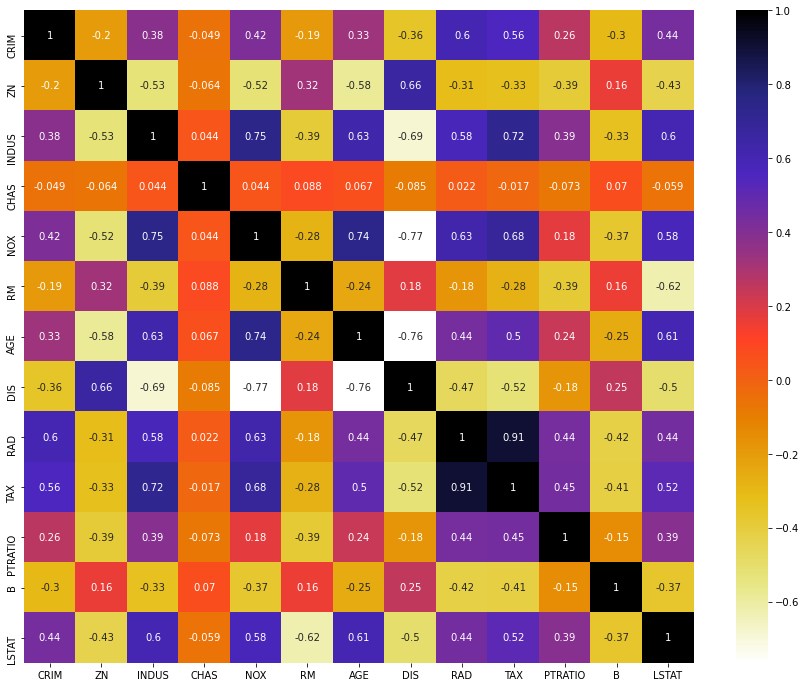

In [30]:
import seaborn as sns
# Using pearson Corelation
plt.figure(figsize=(15,12))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [64]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

#### here we use abs in order to make -ve corelated values to positive if u want negartve corealted values as well dont use abs

### Basically we drp variable having 0.8 or more corealtion between indipendent variable

In [65]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

## ABS Example

In [63]:
float = -54.26
print('Absolute value of float is:', abs(float))
 
# An integer
int = -94
print('Absolute value of integer is:', abs(int))
 
# A complex number
complex = (3 - 4j)
print('Absolute value or Magnitude of complex is:', abs(complex))

Absolute value of float is: 54.26
Absolute value of integer is: 94
Absolute value or Magnitude of complex is: 5.0


### .ADD Example

##### set.add(elem)
The add() method doesn't add an element to the set if it's already present in it otherwise it will get added to the set.
###### Parameters:
add() takes single parameter(elem) which needs to be added in the set.

### Feature Secetion Corelation Continue

In [67]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [68]:
# drop variable

X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


# Let try with Big Dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [70]:
df=pd.read_csv('train.csv',nrows=2500)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

<AxesSubplot:>

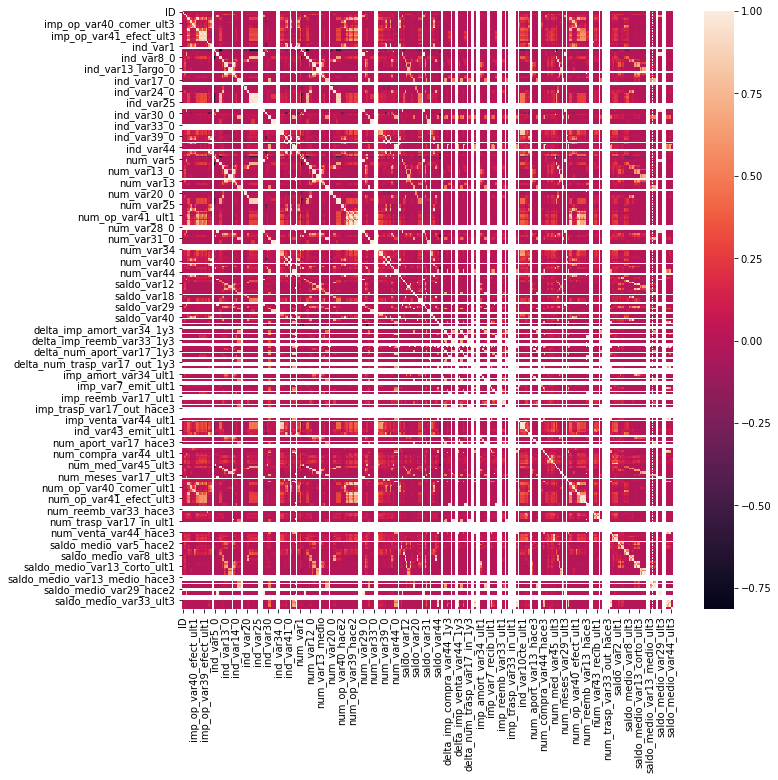

In [71]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

## Notice
#### * Here Heat map is not clear we directly use that function here

In [73]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

153

In [74]:
corr_features

{'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var17',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_var13_ult1',
 'num_aport_var17_ult1',
 'num_

In [75]:
X_train.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,var38
1988,3970,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,44828.010000
1969,3927,2,60,0.0,411.12,795.39,0.0,0.0,0,0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,53744.100000
1368,2691,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,63715.770000
840,1669,2,41,0.0,1525.89,1845.51,0.0,0.0,0,0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,128455.470000
2214,4451,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,48498.870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2046,2,35,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,117310.979016
1731,3462,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,138227.940000
763,1528,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,97885.080000
835,1660,2,38,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0.0,0,0,0,0.0,0.0,0.0,0.0,45189.330000


### 3- Feature Selection-Information gain - mutual information In Classification Problem Statements
##### Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

##### I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

##### Youtube Videos
Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0

Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA

Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

In [2]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.Wine.unique()

array([1, 2, 3], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X=df.drop("Wine",axis=1)
y=df["Wine"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((124, 13), (54, 13))

In [10]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.42397247, 0.30106065, 0.17653996, 0.23628009, 0.17575012,
       0.47846097, 0.71685092, 0.09991703, 0.27104686, 0.61323083,
       0.5685483 , 0.5454572 , 0.52532722])

In [12]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info

Alcohol                 0.423972
Malic.acid              0.301061
Ash                     0.176540
Acl                     0.236280
Mg                      0.175750
Phenols                 0.478461
Flavanoids              0.716851
Nonflavanoid.phenols    0.099917
Proanth                 0.271047
Color.int               0.613231
Hue                     0.568548
OD                      0.545457
Proline                 0.525327
dtype: float64

In [14]:
# sort columns in ascending order
mutual_info.sort_values(ascending=False)

Flavanoids              0.716851
Color.int               0.613231
Hue                     0.568548
OD                      0.545457
Proline                 0.525327
Phenols                 0.478461
Alcohol                 0.423972
Malic.acid              0.301061
Proanth                 0.271047
Acl                     0.236280
Ash                     0.176540
Mg                      0.175750
Nonflavanoid.phenols    0.099917
dtype: float64

### Note
You have to handle null values in Mutual Information, otherwise it throws an error, Aso the output ranges from 0 to 1 in Mutual Information, nd the highest value of feature means the dependncy on target variable of that feature is too much, for eg - as in our case for Flavanoids

<AxesSubplot:>

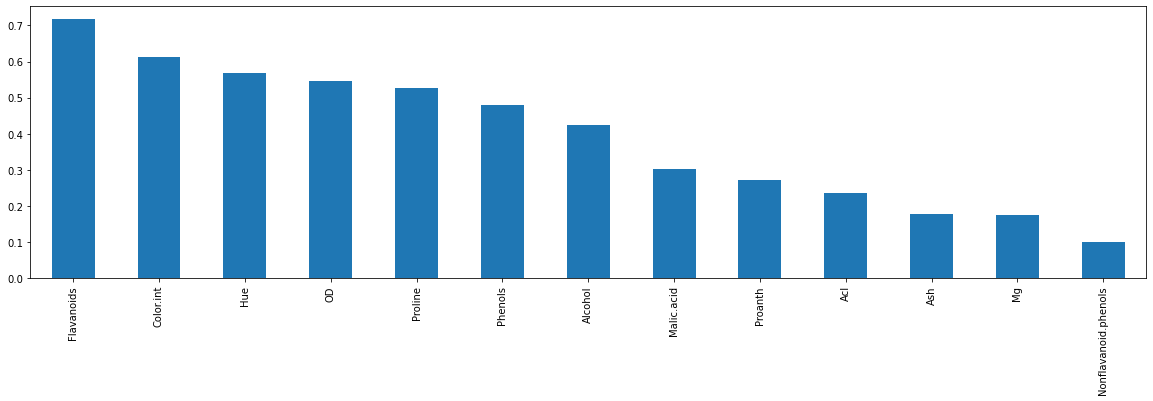

In [19]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,5))

In [20]:
from sklearn.feature_selection import SelectKBest

## Note
* If u are using selectkbest then you can select top 5,10,20 any feature based on K values

In [24]:
#Now we Will select the  top 5 important features
sel_five_cols=SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(X_train,y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

##### get_support-- USed to gt index names

## Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.



### Comparion of Univariate And Mutual Information
### Comparison of F-test and mutual information 
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

# 4-Feature Selection-Information gain - mutual information In Regression Problem Statements

In [14]:
housing_df=pd.read_csv("housing.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
ab=pd.Series(housing_df.isnull().mean())

In [28]:
ab[ab>0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [29]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### In this there we take only int and float as there are a lot catgorial variable we have to treat them as well which we have done earlier

In [32]:
numeric_lst=["int16","int32","int64","float16","float32","float64"]
numeric_cols=list(housing_df.select_dtypes(include=numeric_lst).columns)
numeric_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [33]:
housing_df=housing_df[numeric_cols]
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [34]:
# Drop ID
housing_df=housing_df.drop("Id",axis=1)

In [35]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [37]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009


In [38]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [39]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info
# we use fillna to fill null values we already discussed on how to trat missing values, so we just used 0 to fill val.

array([0.25211754, 0.21133695, 0.16761581, 0.53084271, 0.10046403,
       0.34118799, 0.23525449, 0.1050388 , 0.16169389, 0.        ,
       0.1123163 , 0.38297831, 0.31080507, 0.22905194, 0.01509091,
       0.48242697, 0.02657134, 0.        , 0.27843448, 0.07476206,
       0.04673582, 0.02594296, 0.18048457, 0.1734618 , 0.27191269,
       0.37624566, 0.3653561 , 0.0632854 , 0.15798231, 0.0097661 ,
       0.00346905, 0.03220238, 0.        , 0.        , 0.        ,
       0.0015249 ])

In [40]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.530843
GrLivArea        0.482427
TotalBsmtSF      0.382978
GarageCars       0.376246
GarageArea       0.365356
YearBuilt        0.341188
1stFlrSF         0.310805
FullBath         0.278434
GarageYrBlt      0.271913
MSSubClass       0.252118
YearRemodAdd     0.235254
2ndFlrSF         0.229052
LotFrontage      0.211337
TotRmsAbvGrd     0.180485
Fireplaces       0.173462
LotArea          0.167616
BsmtFinSF1       0.161694
OpenPorchSF      0.157982
BsmtUnfSF        0.112316
MasVnrArea       0.105039
OverallCond      0.100464
HalfBath         0.074762
WoodDeckSF       0.063285
BedroomAbvGr     0.046736
ScreenPorch      0.032202
BsmtFullBath     0.026571
KitchenAbvGr     0.025943
LowQualFinSF     0.015091
EnclosedPorch    0.009766
3SsnPorch        0.003469
YrSold           0.001525
BsmtFinSF2       0.000000
MoSold           0.000000
PoolArea         0.000000
MiscVal          0.000000
BsmtHalfBath     0.000000
dtype: float64

<AxesSubplot:>

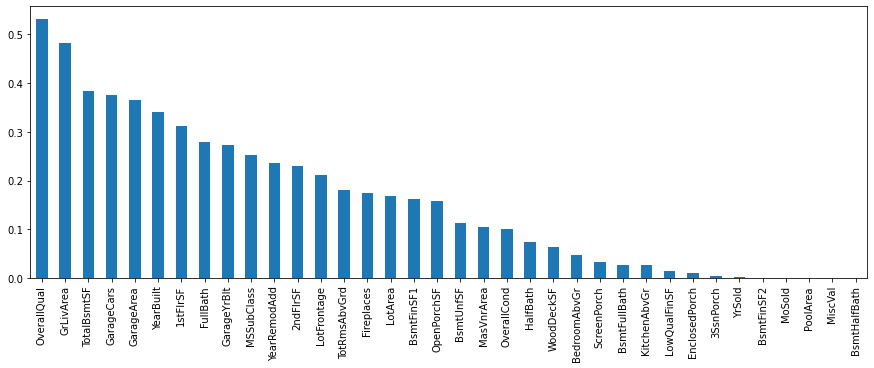

In [41]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

#### Here OverallQual is most dependent feature

In [42]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000021BAD7226A8>)

In [43]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

###### Top 20 percentile means out of all these features if "YearBuilt" is in my top 20 percentile feature it says how many num of feature are having less dependency when comapared to this, means 20% of our feature are having less num of dependency w.r.t this feature

# 5-Fisher Score- Chisquare Test For Feature Selection
Compute chi-squared stats between each non-negative feature and class.

* This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories

In [29]:
import seaborn as sns
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
# select only ctaegorial feature
df1=df.select_dtypes(exclude=["int64","float64"])
df1.head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
### Altrnatively we can select some multiple columns manually

In [30]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


## Note
##### We need to apply label encoding before appling CHI square, it most imp requiremenrt

## Lets apply Label Encodeing

In [31]:
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [33]:
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [36]:
{k:i for i,k in enumerate(df["embarked"].unique(),0)}

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [38]:
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df["embarked"]=df["embarked"].map(ordinal_label)
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [39]:
# Encoding on Alone column
# As alone is an bolean column
df["alone"].value_counts()

True     537
False    354
Name: alone, dtype: int64

In [40]:
df["alone"]=np.where(df["alone"]==True,1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [41]:
## Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [42]:
X_train.head()

,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [44]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [45]:
## Apply Chi square
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [46]:
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

* Here Row1-array([65.67929505,  7.55053653, 10.88471585, 21.97994154] is my F-Score these need to be higher, hgher the fscore better is the feature
* Row2- array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06] is my P-Value this need to be lower, as we know it would be less than .05

In [52]:
# Look at the P_Values
p_values=f_p_values[1]
p_values=pd.Series(p_values)
p_values.index=X_train.columns

p_values.sort_index(ascending=True)

alone       9.696105e-04
embarked    5.999221e-03
pclass      2.755149e-06
sex         5.306038e-16
dtype: float64

### These is the reason we use p_values.sort_index(ascending=True)

In [53]:
p_values.index

Index(['sex', 'embarked', 'alone', 'pclass'], dtype='object')

## Observation
* Sex Column is the most important column when compared to the output feature Survived

### Chi square is also known Fisher Score

# Feature Selection Day-7

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mobile_dataset.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# Selecting dependent and independent feature
X=df.iloc[:,:-1]
y=df['price_range']

In [7]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

# Univariate Selection

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [11]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x0000024040E54510>)

In [13]:
ordered_feature.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [14]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [23]:
# Convert this into dataframe
nm=pd.Series(ordered_feature.scores_)

In [27]:
nm.index=X.columns

In [30]:
nm.sort_values(ascending=False)

ram              931267.519053
px_height         17363.569536
battery_power     14129.866576
px_width           9810.586750
mobile_wt            95.972863
int_memory           89.839124
sc_w                 16.480319
talk_time            13.236400
fc                   10.135166
sc_h                  9.614878
pc                    9.186054
n_cores               9.097556
touch_screen          1.928429
four_g                1.521572
m_dep                 0.745820
blue                  0.723232
clock_speed           0.648366
dual_sim              0.631011
wifi                  0.422091
three_g               0.327643
dtype: float64

# Alternatively we can also do

In [32]:
# Create a dataframe of ordered_feature.scores_
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfscores.head(3)

,Score
0,14129.866576
1,0.723232
2,0.648366


In [35]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [33]:
# Create a dataframe of all the columns present in X.columns
dfcolumns=pd.DataFrame(X.columns)
dfcolumns.head()

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc


In [46]:
features_rank=pd.concat([dfscores,dfcolumns],axis=1)
features_rank.head()

,Score,0
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc


In [48]:
features_rank.columns=["Score","Features"]
features_rank.sort_values(["Score"],ascending=False)

,Score,Features
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


In [50]:
# Selecting top largest
features_rank.nlargest(10,["Score"])

,Score,Features
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


# Feature Importance
* This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [52]:
print(model.feature_importances_)

[0.05991961 0.01917119 0.03355313 0.02047946 0.03316325 0.01733183
 0.03643229 0.03421571 0.03704297 0.03376664 0.03418433 0.0457326
 0.04753573 0.3910088  0.03429333 0.03470017 0.0345744  0.01394641
 0.01926471 0.01968343]


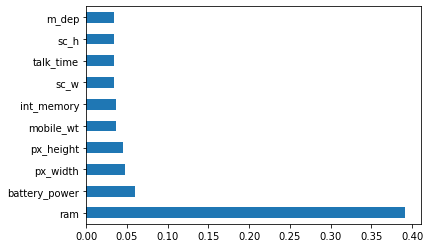

In [53]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()